<a href="https://colab.research.google.com/github/ssunwalka01/LIAR-LIAR-Dataset-FAKE_NEWS_Classification/blob/master/06November2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIAR LIAR Dataset Clasification (Fake-News Analysis)

Let’s look at the steps that we will follow in this course.

- Problem Statement
- Hypothesis Generation
- Getting the system ready and loading the data
- Understanding the data
- Exploratory Data Analysis (EDA)
- Univariate Analysis
- Bivariate Analysis
- Missing value and outlier treatment
- Evaluation Metrics for classification problems
-    Model Building : Part I
- Logistic Regression using stratified k-folds cross validation
- Feature Engineering
- Model Building : Part II
- Logistic Regression
- Decision tree
- Random Forest
- XGBoost
Lets look at each section in detail.

It is a classification problem where we have to predict whether a News Statement would be classified as Fake or Not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

- Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.
- Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

In [0]:
# importing packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [0]:
##################
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import nltk
import re
import codecs
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Data

For this practice problem, we have been given three CSV files: train, test and sample submission.

- Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
- Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.
- Sample submission file contains the format in which we have to submit our predictions.

- Let's start with loading the data
PS: The data was in 'tsv' format which is then converted into 'csv' format later for analysing purpose.
The Dataset available for the research purpose containg train,test and validation sets.

In [0]:
# converting train, test, and valid datasets into csv format
#train
tsv_file='/content/train.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('train_converted.csv',index=False)

In [0]:
#test
tsv_file1='/content/test.tsv'
csv_table1=pd.read_table(tsv_file1,sep='\t')
csv_table1.to_csv('test_converted.csv',index=False)

In [0]:
#valid
tsv_file2='/content/valid.tsv'
csv_table2=pd.read_table(tsv_file2,sep='\t')
csv_table2.to_csv('valid_converted.csv',index=False)

# Reading Data

In [0]:
train=pd.read_csv('/content/train_converted.csv')
test=pd.read_csv('/content/test_converted.csv')
valid=pd.read_csv('/content/valid_converted.csv')

In [7]:
train.columns

Index(['2635.json', 'false',
       'Says the Annies List political group supports third-trimester abortions on demand.',
       'abortion', 'dwayne-bohac', 'State representative', 'Texas',
       'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'],
      dtype='object')

In [0]:
# Naming columns
train.columns=["ID","Label","Statement","Subject(s)","Speaker","Speaker's job title","state info","party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","the context (venue/location of speech or statement)"]

In [9]:
train.head()

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [10]:
train.shape

(10239, 14)

In [11]:
test.shape

(1266, 14)

In [12]:
valid.shape

(1283, 14)

In [0]:
# Naming columns 
test.columns=["ID","Label","Statement","Subject(s)","Speaker","Speaker's job title","state info","party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","the context (venue/location of speech or statement)"]

In [0]:
# Naming columns 
valid.columns=["ID","Label","Statement","Subject(s)","Speaker","Speaker's job title","state info","party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","the context (venue/location of speech or statement)"]

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.


In [0]:
train_copy=pd.read_csv('train.csv').copy()
test_copy=pd.read_csv('test.csv').copy()
valid_copy=pd.read_csv('valid.csv').copy()

In [16]:
train.head(10)

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
5,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
6,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
7,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
8,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video
9,7115.json,mostly-true,"For the first time in history, the share of th...",elections,robert-menendez,U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,a speech


In [17]:
test.head(10)

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website
5,7070.json,true,Says that Tennessee law requires that schools ...,"county-budget,county-government,education,taxes",stand-children-tennessee,Child and education advocacy organization.,Tennessee,none,0,0,0,0,0,in a post on Facebook.
6,1046.json,barely-true,"Says Vice President Joe Biden ""admits that the...","economy,stimulus",john-boehner,Speaker of the House of Representatives,Ohio,republican,13,22,11,4,2,a press release.
7,12849.json,true,Donald Trump is against marriage equality. He ...,"gays-and-lesbians,marriage",sean-patrick-maloney,Congressman for NY-18,New York,democrat,0,0,0,0,0,a speech at the Democratic National Convention
8,13270.json,barely-true,We know that more than half of Hillary Clinton...,foreign-policy,mike-pence,Governor,Indiana,republican,8,10,12,5,0,"comments on ""Meet the Press"""
9,6649.json,barely-true,We know there are more Democrats in Georgia th...,elections,mike-berlon,NaN,Georgia,democrat,1,0,0,0,0,an article


In [18]:
valid.head(10)

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H."
5,6861.json,true,Says Tennessee is providing millions of dollar...,"education,state-budget",andy-berke,Lawyer and state senator,Tennessee,democrat,0,0,0,0,0,a letter to state Senate education committee c...
6,1122.json,false,The health care reform plan would set limits s...,health-care,club-growth,NaN,NaN,none,4,5,4,2,0,a TV ad
7,13138.json,true,Says Donald Trump started his career back in 1...,"candidates-biography,diversity,housing",hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,the first presidential debate
8,1880.json,half-true,Bill White has a long history of trying to lim...,military,republican-party-texas,NaN,Texas,republican,3,1,1,3,1,an e-mail
9,12803.json,half-true,John McCains chief economic adviser during the...,economy,tim-kaine,U.S. Senator,Virginia,democrat,8,3,15,15,0,a speech at the Democratic National Convention...


Loaded the datasets. Let's move to Univariate Analysis

- Combining train and validation sets here. Later We will use validation techniques

In [0]:
train = pd.concat([train, valid])

In [20]:
train.shape

(11522, 14)

In [0]:
# Dropping Target Variable from test set
Label_test = test.iloc[:,[1]]
test=test.drop(['Label'], axis=1)

# Univariate Analysis

In [22]:
print(train.dtypes)

ID                                                      object
Label                                                   object
Statement                                               object
Subject(s)                                              object
Speaker                                                 object
Speaker's job title                                     object
state info                                              object
party affiliation                                       object
barely true counts                                     float64
false counts                                           float64
half true counts                                       float64
mostly true counts                                     float64
pants on fire counts                                   float64
the context (venue/location of speech or statement)     object
dtype: object


In [23]:
print(test.dtypes)

ID                                                     object
Statement                                              object
Subject(s)                                             object
Speaker                                                object
Speaker's job title                                    object
state info                                             object
party affiliation                                      object
barely true counts                                      int64
false counts                                            int64
half true counts                                        int64
mostly true counts                                      int64
pants on fire counts                                    int64
the context (venue/location of speech or statement)    object
dtype: object


In [24]:
# shape of datasets
train.shape, test.shape

((11522, 14), (1266, 13))

In [25]:
train['Label'].value_counts(normalize=True)
# Read as percentage after multiplying by 100

half-true      0.204999
false          0.195886
mostly-true    0.192067
barely-true    0.164034
true           0.160128
pants-fire     0.082885
Name: Label, dtype: float64

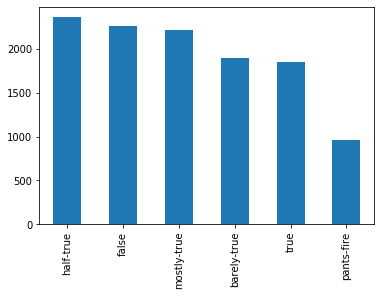

In [26]:
train['Label'].value_counts().plot.bar()

On Looking at the datsets, we identified that there are 3 Data Types:
- Continuous : ID, barely true counts, false counts, half true counts, mostly true counts, pants on fire counts.

- Categorical : Label, Subject(s), Speaker, Speaker's job title, State info, party affiliation, the context (venue/location of speech or statement)

- Text : Statement

Let's go for Continuous Data Type Exploration.
We know that we use BarGraphs for Categorical variable, Histogram or ScatterPlot for continuous variables.

- Continuous Variables

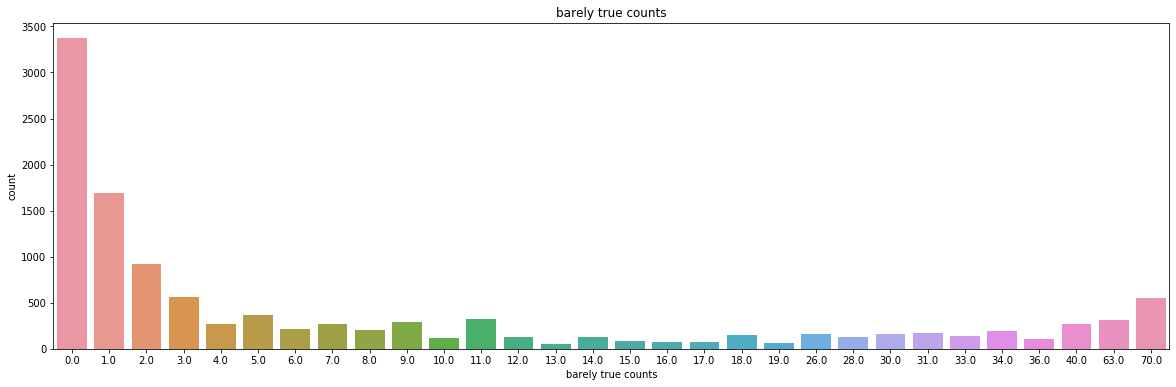

In [27]:
# barely true counts
plt.figure(figsize=(20, 6))
sns.countplot(train["barely true counts"])
plt.title('barely true counts')
plt.show()

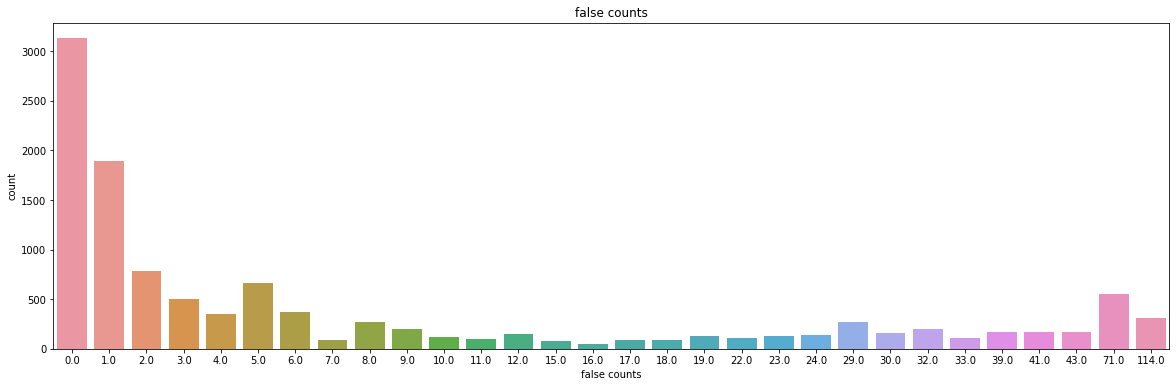

In [28]:
# false counts
plt.figure(figsize=(20, 6))
sns.countplot(train["false counts"])
plt.title('false counts')
plt.show()

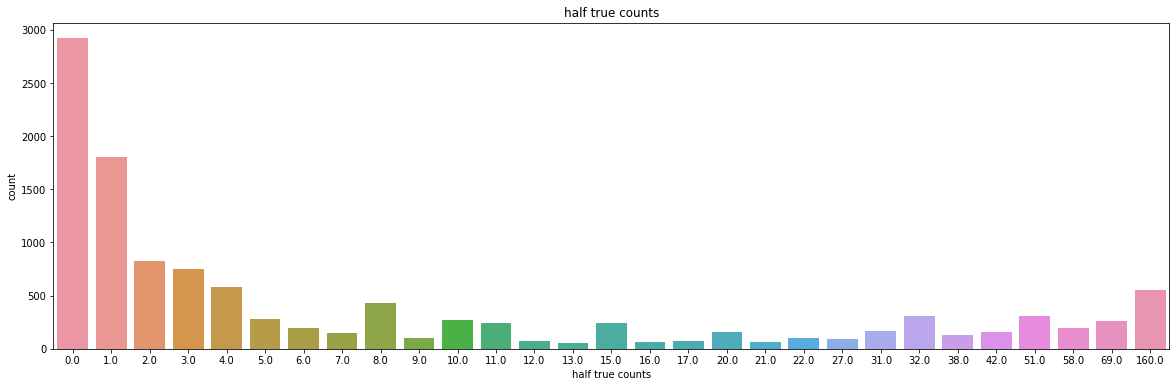

In [29]:
# half true counts
plt.figure(figsize=(20, 6))
sns.countplot(train["half true counts"])
plt.title('half true counts')
plt.show()

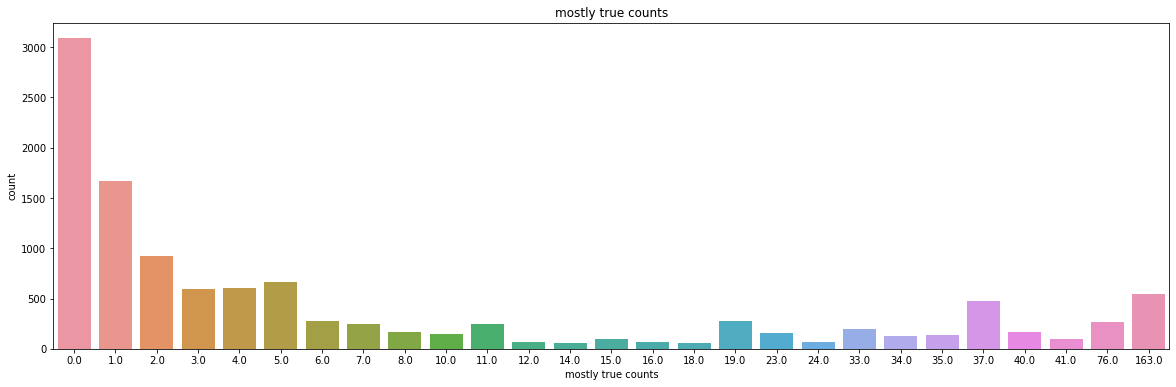

In [30]:
# mostly true counts
plt.figure(figsize=(20, 6))
sns.countplot(train["mostly true counts"])
plt.title('mostly true counts')
plt.show()

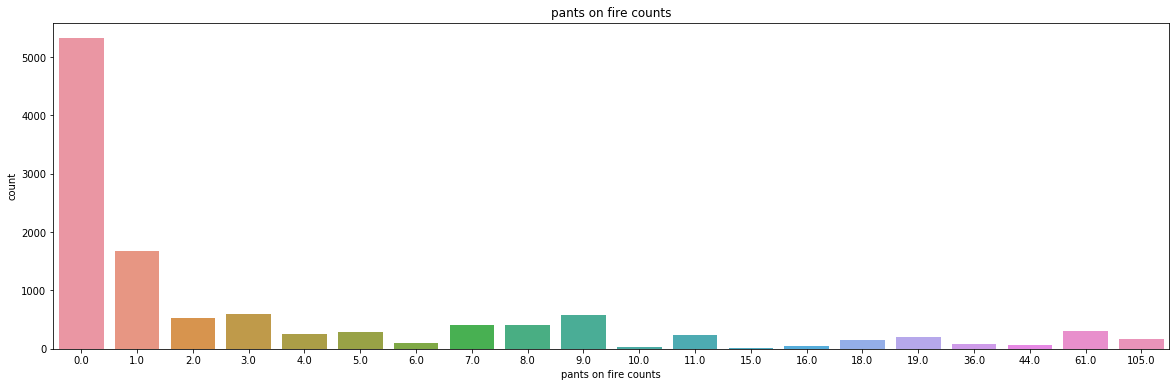

In [31]:
# pants on fire counts 
plt.figure(figsize=(20, 6))
sns.countplot(train["pants on fire counts"])
plt.title('pants on fire counts')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 2160x2160 with 0 Axes>

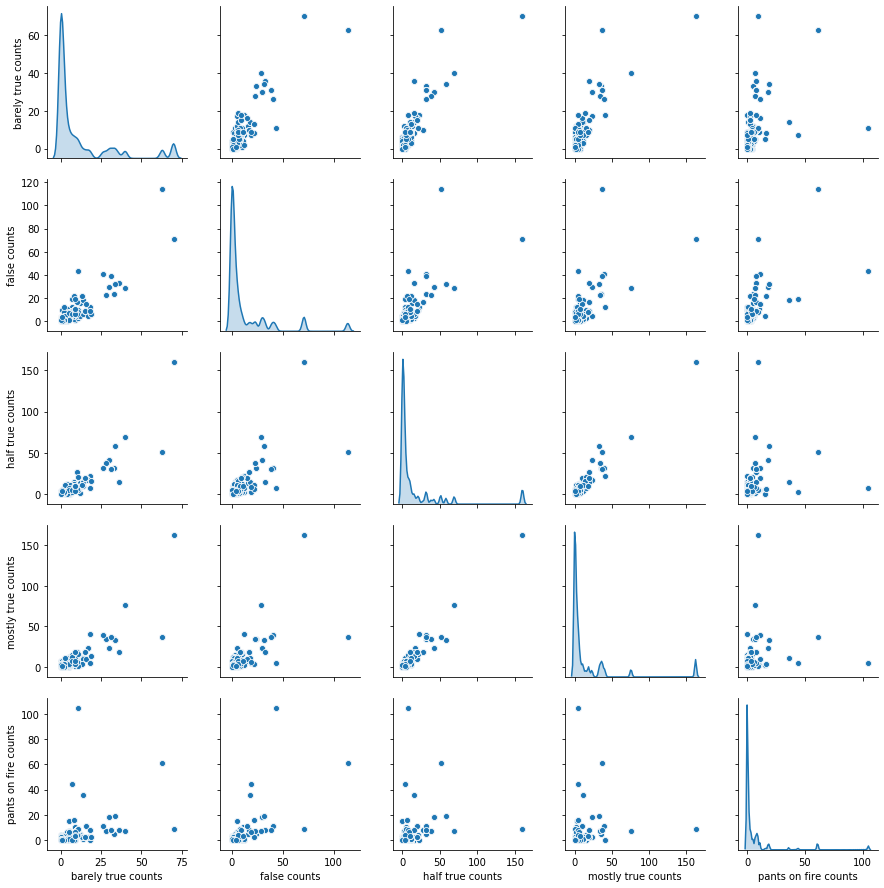

In [32]:
# Pairplot for cross visualisation of continuous variables
plt.figure(figsize=(30,30))
sns.pairplot(train, diag_kind='kde');

- Spread of Target Variable

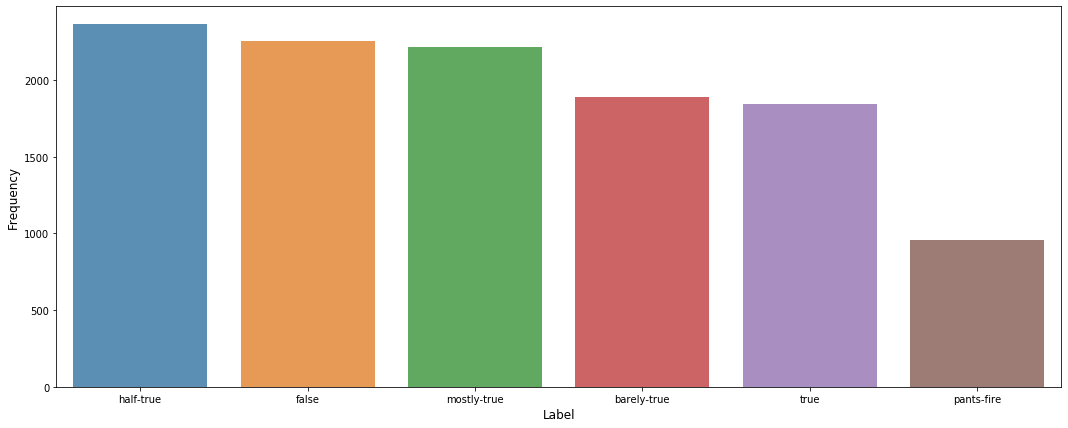

In [33]:
cnt_srs = train['Label'].value_counts()
plt.figure(figsize=(18,7))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

# Data Preprocessing

- Checking Missing Values

In [0]:
def missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_df = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
    return missing_df

In [35]:
x_train = missing_value(train)
x_train

,Total,Percent
Speaker's job title,3242,28.137476
state info,2487,21.584794
the context (venue/location of speech or statement),114,0.989412
pants on fire counts,2,0.017358
mostly true counts,2,0.017358
half true counts,2,0.017358
false counts,2,0.017358
barely true counts,2,0.017358
party affiliation,2,0.017358
Speaker,2,0.017358


In [36]:
x_test = missing_value(test)
x_test

,Total,Percent
Speaker's job title,325,25.671406
state info,262,20.695103
the context (venue/location of speech or statement),17,1.342812
pants on fire counts,0,0.000000
mostly true counts,0,0.000000
half true counts,0,0.000000
false counts,0,0.000000
barely true counts,0,0.000000
party affiliation,0,0.000000
Speaker,0,0.000000


We need to treat the missing values here. It will reduce the model accuracy otherwise.

In [0]:
# Filling Missing Values with Unknown Variable
values = {"Speaker's job title":'Unknown'}
train = train.fillna(value=values)
test = test.fillna(value=values)
#valid = valid.fillna(value=values)

In [0]:
# Filling Missing Values with Unknown Variable
values = {"state info":'Unknown1'}
train = train.fillna(value=values)
test = test.fillna(value=values)
#valid = valid.fillna(value=values)

In [0]:
train['the context (venue/location of speech or statement)'].fillna(train['the context (venue/location of speech or statement)'].mode()[0], inplace=True)
test['the context (venue/location of speech or statement)'].fillna(test['the context (venue/location of speech or statement)'].mode()[0], inplace=True)
#valid['the context (venue/location of speech or statement)'].fillna(valid['the context (venue/location of speech or statement)'].mode()[0], inplace=True)

In [0]:
train['pants on fire counts'].fillna(train['pants on fire counts'].median(), inplace=True)
train['mostly true counts'].fillna(train['mostly true counts'].median(), inplace=True)
train['half true counts'].fillna(train['half true counts'].median(), inplace=True)
train['false counts'].fillna(train['false counts'].median(), inplace=True)
train['barely true counts'].fillna(train['barely true counts'].median(), inplace=True)
train['party affiliation'].fillna(train['party affiliation'].mode()[0], inplace=True)
train['Speaker'].fillna(train['Speaker'].mode()[0], inplace=True)
train['Subject(s)'].fillna(train['Subject(s)'].mode()[0], inplace=True)

In [41]:
# Checking again for missing values
y_train = missing_value(train)
y_train

,Total,Percent
the context (venue/location of speech or statement),0,0.0
pants on fire counts,0,0.0
mostly true counts,0,0.0
half true counts,0,0.0
false counts,0,0.0
barely true counts,0,0.0
party affiliation,0,0.0
state info,0,0.0
Speaker's job title,0,0.0
Speaker,0,0.0


In [42]:
# Checking again for missing values
y_test = missing_value(test)
y_test

,Total,Percent
the context (venue/location of speech or statement),0,0.0
pants on fire counts,0,0.0
mostly true counts,0,0.0
half true counts,0,0.0
false counts,0,0.0
barely true counts,0,0.0
party affiliation,0,0.0
state info,0,0.0
Speaker's job title,0,0.0
Speaker,0,0.0


In [0]:
# Checking again for missing values
#y_valid = missing_value(valid)
#y_valid

- Targeting Statement Column

In [44]:
train.shape

(11522, 14)

In [0]:
#removing non-letter symbols and converting text in 'Statement' to lowercase 
train['Statement'] = train['Statement'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]", '',str(x))))
test['Statement'] = test['Statement'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))
#valid['Statement'] = valid['Statement'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))

# lower casing the Text
train['Statement'] = train['Statement'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['Statement'] = test['Statement'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
#Removing punctuations
#adding characters list which needs to remove that is PUNCTUATION
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'/','<','>','br','�','^','XX','XXXX','xxxx','xx']
#removing extra characters
train['Statement'] = train['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))
test['Statement'] = test['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))

In [0]:
import nltk

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#removal of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['Statement'] = train['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['Statement'] = test['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [0]:
#common words removal
freq_train = pd.Series(' '.join(train['Statement']).split()).value_counts()[:10]
freq_test = pd.Series(' '.join(test['Statement']).split()).value_counts()[:10]
#freq_valid = pd.Series(' '.join(valid['Statement']).split()).value_counts()[:10]

freq_train = list(freq_train.index)
train['Statement'] = train['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train))
freq_test = list(freq_test.index)
test['Statement'] = test['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test))
#freq_valid = list(freq_valid.index)
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_valid))

In [0]:
#rare words removal
freq_train_rare = pd.Series(' '.join(train['Statement']).split()).value_counts()[-10:]
freq_train_rare = list(freq_train_rare.index)
train['Statement'] = train['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_train_rare))

freq_test_rare = pd.Series(' '.join(test['Statement']).split()).value_counts()[-10:]
freq_test_rare = list(freq_test_rare.index)
test['Statement'] = test['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test_rare))

#freq_valid_rare = pd.Series(' '.join(valid['Statement']).split()).value_counts()[-10:]
#freq_valid_rare = list(freq_valid_rare.index)
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_valid_rare))

In [0]:
#STEMMING
st = PorterStemmer()
train['Statement']=train['Statement'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))
test['Statement']=test['Statement'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))

In [53]:
train.head()

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540.json,half-true,declin coal start start natur ga took start be...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,hillari clinton agre john mccain vote give geo...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,care reform legisl like mandat free sex chang ...,health-care,blog-posting,Unknown,Unknown1,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,econom turnaround start end term,"economy,jobs",charlie-crist,Unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,chicago bear start quarterback last total numb...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [0]:
# Removing .json extension
train['ID'] = train['ID'].str.rstrip('.json')

In [0]:
test['ID'] = test['ID'].str.rstrip('.json')

In [0]:
#ID = train.iloc[:,[1]]
#train=train.drop(['ID'], axis=1)

In [57]:
train.columns, test.columns

(Index(['ID', 'Label', 'Statement', 'Subject(s)', 'Speaker',
        'Speaker's job title', 'state info', 'party affiliation',
        'barely true counts', 'false counts', 'half true counts',
        'mostly true counts', 'pants on fire counts',
        'the context (venue/location of speech or statement)'],
       dtype='object'),
 Index(['ID', 'Statement', 'Subject(s)', 'Speaker', 'Speaker's job title',
        'state info', 'party affiliation', 'barely true counts', 'false counts',
        'half true counts', 'mostly true counts', 'pants on fire counts',
        'the context (venue/location of speech or statement)'],
       dtype='object'))

In [0]:
X = train.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]

In [0]:
X1 = test.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]

In [0]:
X3 = pd.get_dummies(X1)

In [0]:
X2 = pd.get_dummies(X)   # gives (1451, 221)  
#test = pd.get_dummies(test)    # gives (1459, 206)  
x, x1 = X2.align(X3, join='inner', axis=1)  # inner join

In [0]:
x, x1 = X2.align(X3, join='inner', axis=1)  # inner join

In [63]:
x.shape, x1.shape

((11522, 1155), (1266, 1155))

In [0]:
#x = x_data(train)  #train set

In [0]:
#x1 = x_data(test)

In [0]:
#x.shape, x1.shape

In [67]:
train.head()

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540,half-true,declin coal start start natur ga took start be...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324,mostly-true,hillari clinton agre john mccain vote give geo...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123,false,care reform legisl like mandat free sex chang ...,health-care,blog-posting,Unknown,Unknown1,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028,half-true,econom turnaround start end term,"economy,jobs",charlie-crist,Unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465,true,chicago bear start quarterback last total numb...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [0]:
rest_df_train = train.loc[:,['ID','barely true counts','false counts',"half true counts",'mostly true counts','pants on fire counts']]
rest_df_test = test.loc[:,['ID','barely true counts','false counts',"half true counts",'mostly true counts','pants on fire counts']]

In [69]:
rest_df_train.head(), rest_df_test.head()

(      ID  barely true counts  ...  mostly true counts  pants on fire counts
 0  10540                 0.0  ...                 1.0                   0.0
 1    324                70.0  ...               163.0                   9.0
 2   1123                 7.0  ...                 5.0                  44.0
 3   9028                15.0  ...                19.0                   2.0
 4  12465                 0.0  ...                 5.0                   1.0
 
 [5 rows x 6 columns],
       ID  barely true counts  ...  mostly true counts  pants on fire counts
 0  11685                   2  ...                   0                     0
 1  11096                  63  ...                  37                    61
 2   5209                   1  ...                   1                     1
 3   9524                   5  ...                   2                     7
 4   5962                   1  ...                   1                     0
 
 [5 rows x 6 columns])

In [70]:
#NOw We will convert the target variable into LabelEncoder
y_train = train.loc[:,['Label']]
labelencoder1 = LabelEncoder()
labelencoder1.fit(y_train.values)
y_train=labelencoder1.transform(y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#pd.DataFrame(y_train).nunique()

In [0]:
# Converting the Text into list
stat_train = train['Statement'].tolist()
stat_test = test['Statement'].tolist()

# Adding train and test data
lis_stat = stat_train + stat_test 

In [73]:
#Fitting TFIDF on summary
tfv_sum = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv_sum.fit(lis_stat)
print(tfv_sum.vocabulary_)
print(tfv_sum.idf_)
xtrain_tfv_sum =  tfv_sum.transform(stat_train).toarray()
xtest_tfv_sum = tfv_sum.transform(stat_test).toarray()
type(xtrain_tfv_sum)

{'declin': 1111, 'coal': 840, 'start': 4254, 'natur': 2927, 'ga': 1805, 'took': 4556, 'begin': 393, 'georg': 1846, 'bush': 596, 'administr': 64, 'hillari': 2067, 'clinton': 826, 'agre': 99, 'john': 2360, 'mccain': 2708, 'vote': 4812, 'benefit': 410, 'doubt': 1313, 'iran': 2298, 'care': 650, 'reform': 3683, 'legisl': 2500, 'like': 2542, 'mandat': 2648, 'free': 1769, 'sex': 4027, 'chang': 728, 'surgeri': 4383, 'econom': 1383, 'turnaround': 4637, 'end': 1442, 'term': 4475, 'chicago': 756, 'bear': 380, 'quarterback': 3574, 'total': 4563, 'number': 3025, 'tenur': 4474, 'uw': 4748, 'faculti': 1575, 'decad': 1105, 'jim': 2353, 'live': 2561, 'district': 1269, 'repres': 3743, 'im': 2171, 'person': 3294, 'stage': 4241, 'work': 4947, 'activ': 51, 'pass': 3217, 'russ': 3884, 'feingold': 1625, 'toughest': 4568, 'ethic': 1497, 'sinc': 4088, 'howev': 2129, 'million': 2797, 'oregon': 3108, 'lotteri': 2597, 'fund': 1795, 'port': 3401, 'newport': 2962, 'eventu': 1504, 'land': 2460, 'new': 2958, 'noaa': 

numpy.ndarray

In [74]:
xtrain_tfv_sum.shape, xtest_tfv_sum.shape

((11522, 5000), (1266, 5000))

In [0]:
x_train = np.concatenate((x, xtrain_tfv_sum, rest_df_train),axis = 1)
x_test = np.concatenate((x1, xtest_tfv_sum, rest_df_test),axis = 1)

In [76]:
x_train.shape

(11522, 6161)

In [77]:
x_test.shape

(1266, 6161)

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(x_train, y_train)
y_pred1 = classifier1.predict(x_test)

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)

In [84]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=0,C=10)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
ans = labelencoder1.inverse_transform(y_pred)
type(ans)
ans = pd.DataFrame(ans)

In [0]:
id1=test.loc[:,['ID']]
final_ans = [id1, ans]
final_ans = pd.concat(final_ans, axis=1)
final_ans.columns = ['ID', 'Label']
final_ans.to_csv('NLPv1.csv',index=False)

In [0]:
######################################################################################################